In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

In [1]:
fig, ax = plt.subplots(
    figsize=(7, 14 / 5), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

NameError: name 'plt' is not defined

In [ ]:
labels_name = [
    "ModelA\n" + r"2DP$\times $4TP",
    "ModelA\n" + r"2DP$\times $8TP",
    "ModelB\n" + r"2DP$\times $4TP",
    "ModelB\n" + r"2DP$\times $8TP",
    "ModelC\n" + r"2DP$\times $4TP",
    "ModelC\n" + r"2DP$\times $8TP",
    "ModelD\n" + r"2DP$\times $4TP",
    "ModelD\n" + r"2DP$\times $8TP",
]

In [ ]:
# memory cost
data_a = {
    labels_name[0]: [0, 53, 1200],  # 22.64
    labels_name[1]: [0, 53, 1200],  # 22.64
    labels_name[2]: [0, 35, 1200],  # 37
    labels_name[3]: [0, 35, 1200],  # 37
    labels_name[4]: [0, 53, 1200],  # 22.64
    labels_name[5]: [0, 53, 1200],  # 22.64
    labels_name[6]: [0, 53, 1200],  # 22.64
    labels_name[7]: [0, 53, 1200],  # 22.64
}

In [ ]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]

In [ ]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [ ]:
label_set = set()

for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, edgecolor, label, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            legend_labels,
            hatches,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor=edgecolor,
            hatch=hatch,
            label=local_label,
        )


ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 1500)
ax.set_yticks([0, 500, 1000, 1500])
ax.set_yticklabels(["0", "500", "1000", "1500"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=11, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax.set_ylabel("Time (s)", fontsize=g_label_fontsize)
ax.set_title("(b)")

Text(0.5, 1.0, '(b)')

In [ ]:
ax.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    fontsize=g_label_fontsize,
    bbox_to_anchor=(0.5, 1)
)

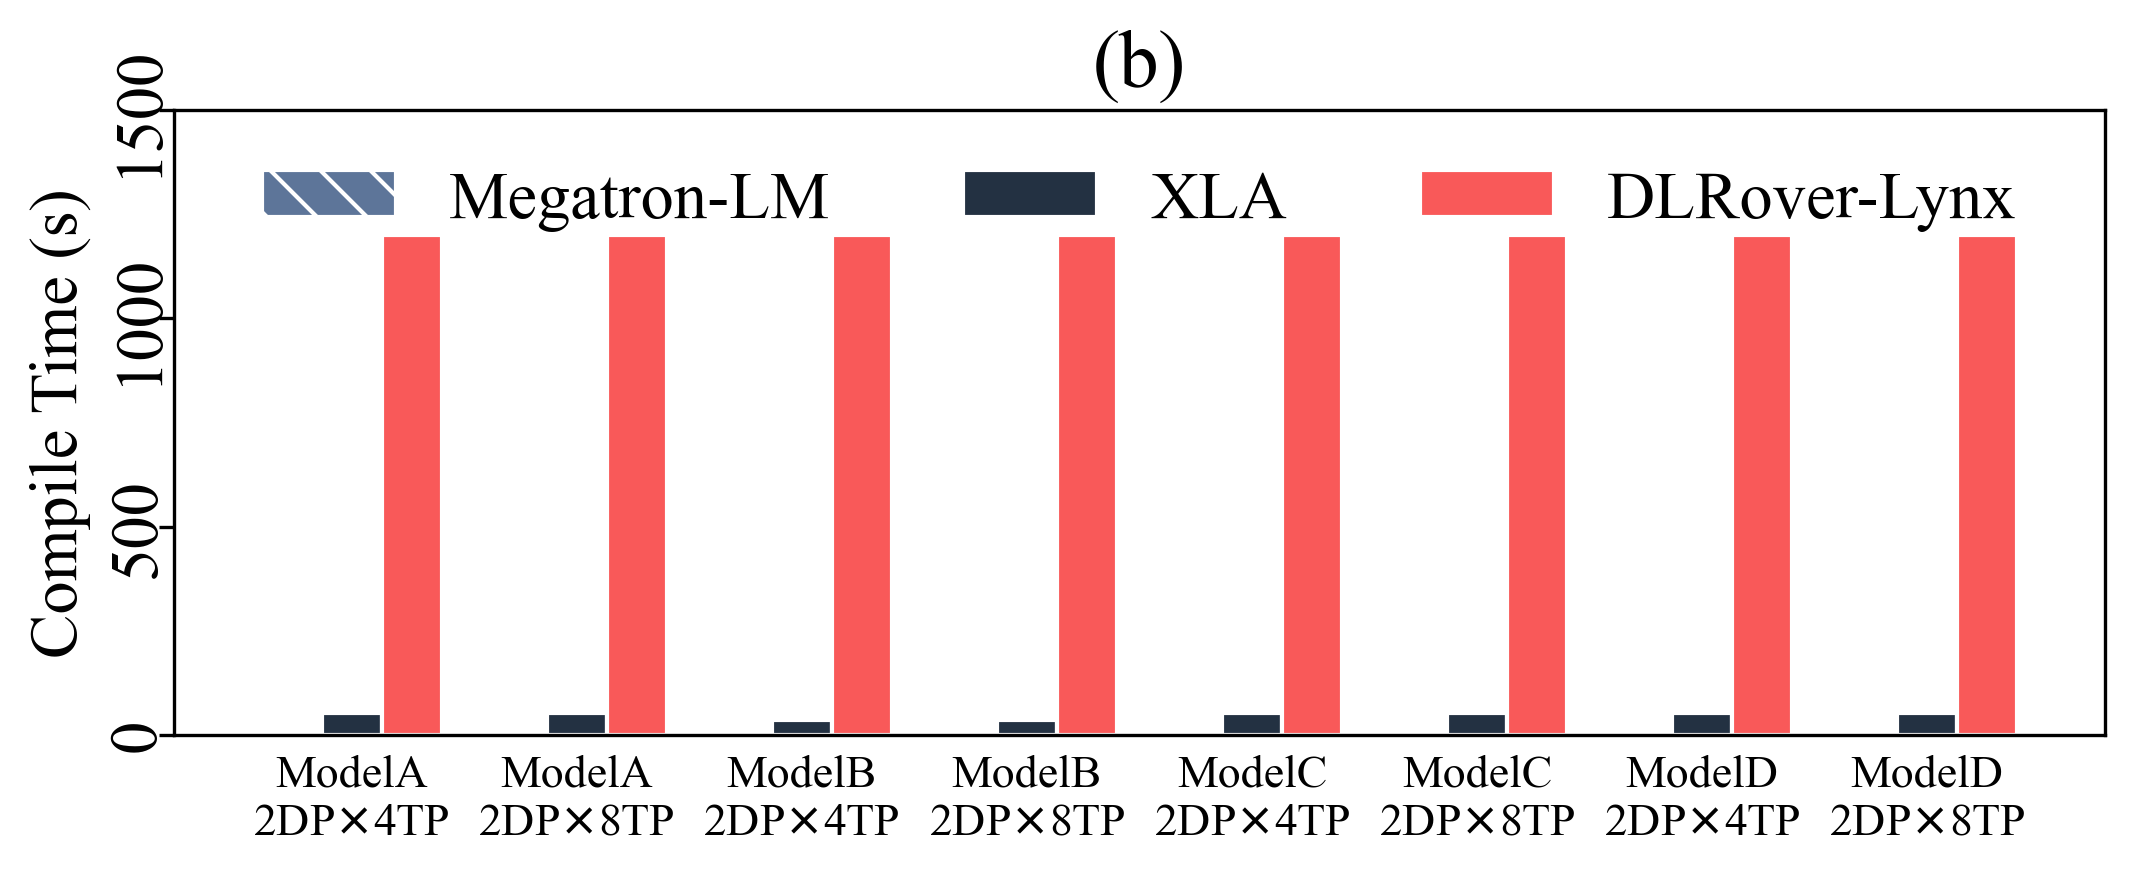

In [ ]:
fig.savefig("compile_time_hybrid.pdf", bbox_inches="tight", dpi=1000)
fig